In [ ]:
import pandas as pd

# Load the datasets
customers = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/eCommerce files/Customers.csv')
products = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/eCommerce files/Products.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/eCommerce files/Transactions.csv')

In [ ]:
print("Customers:")
print(customers.head().to_markdown(index=False, numalign="left", stralign="left"))
print("#########################################################################")
print("\nProducts:")
print(products.head().to_markdown(index=False, numalign="left", stralign="left"))
print("#########################################################################")
print("\nTransactions:")
print(transactions.head().to_markdown(index=False, numalign="left", stralign="left"))
print("#########################################################################")

Customers:
| CustomerID   | CustomerName       | Region        | SignupDate   |
|:-------------|:-------------------|:--------------|:-------------|
| C0001        | Lawrence Carroll   | South America | 2022-07-10   |
| C0002        | Elizabeth Lutz     | Asia          | 2022-02-13   |
| C0003        | Michael Rivera     | South America | 2024-03-07   |
| C0004        | Kathleen Rodriguez | South America | 2022-10-09   |
| C0005        | Laura Weber        | Asia          | 2022-08-15   |
#########################################################################

Products:
| ProductID   | ProductName             | Category    | Price   |
|:------------|:------------------------|:------------|:--------|
| P001        | ActiveWear Biography    | Books       | 169.3   |
| P002        | ActiveWear Smartwatch   | Electronics | 346.3   |
| P003        | ComfortLiving Biography | Books       | 44.12   |
| P004        | BookWorld Rug           | Home Decor  | 95.69   |
| P005        | TechPro T

In [ ]:
print("\nCustomers Info:")
print(customers.info())
print("#########################################################################")
print("\nProducts Info:")
print(products.info())
print("#########################################################################")
print("\nTransactions Info:")
print(transactions.info())
print("#########################################################################")


Customers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
#########################################################################

Products Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB
None
#########################################################################

Trans

In [ ]:
# Check for missing values
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())

# there are no null values

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [ ]:
# Summary statistics
print(customers.describe(include='all'))
print("#########################################################################")
print(products.describe(include='all'))
print("#########################################################################")
print(transactions.describe(include='all'))
print("#########################################################################")

       CustomerID      CustomerName         Region  SignupDate
count         200               200            200         200
unique        200               200              4         179
top         C0001  Lawrence Carroll  South America  2024-11-11
freq            1                 1             59           3
#########################################################################
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  292.875000
7

In [ ]:
merged_data = transactions.merge(customers, on='CustomerID', how='left').merge(products, on='ProductID', how='left')
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [ ]:
customer_transactions = merged_data.groupby('CustomerName')['TransactionID'].count()
customer_transactions.sort_values(ascending=False).head()

# Customer Behavior:

# Here we can see transactions per customer.
# We can also identify the most frequent customers.

,TransactionID
CustomerName,
William Adams,11
Abigail Jones,11
Gerald Hines,10
Paul Parsons,10
David Li,10


In [ ]:
product_sales = merged_data.groupby('ProductName')['Quantity'].sum()
product_sales.sort_values(ascending=False).head()

# Product Popularity:

# Here we can see transactions per product.
# ActiveWear Smartwatch is top-selling products.

,Quantity
ProductName,
ActiveWear Smartwatch,100
SoundWave Headphones,97
HomeSense Desk Lamp,81
ActiveWear Rug,79
SoundWave Cookbook,78


In [ ]:
total_revenue = merged_data['TotalValue'].sum()
print(f"Total Revenue: {total_revenue}")

revenue_by_region = merged_data.groupby('Region')['TotalValue'].sum()
print(revenue_by_region)

revenue_by_product = merged_data.groupby('ProductName')['TotalValue'].sum()
revenue_by_product.sort_values(ascending=False).head()

# Revenue Analysis:

# We can see total revenue for each region.
# ActiveWear Smartwatch is the product and South America is the region contributing most to revenue.

Total Revenue: 689995.56
Region
Asia             152074.97
Europe           166254.63
North America    152313.40
South America    219352.56
Name: TotalValue, dtype: float64


,TotalValue
ProductName,
ActiveWear Smartwatch,39096.97
SoundWave Headphones,25211.64
SoundWave Novel,24507.90
ActiveWear Jacket,22712.56
ActiveWear Rug,22314.43


In [ ]:
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['Month'] = merged_data['TransactionDate'].dt.month
monthly_sales = merged_data.groupby('Month')['TotalValue'].sum()
print(monthly_sales)

# July has highest sale

Month
1     66376.39
2     51459.27
3     47828.73
4     57519.06
5     64527.74
6     48771.18
7     71366.39
8     63436.74
9     70603.75
10    47063.22
11    38224.37
12    62818.72
Name: TotalValue, dtype: float64


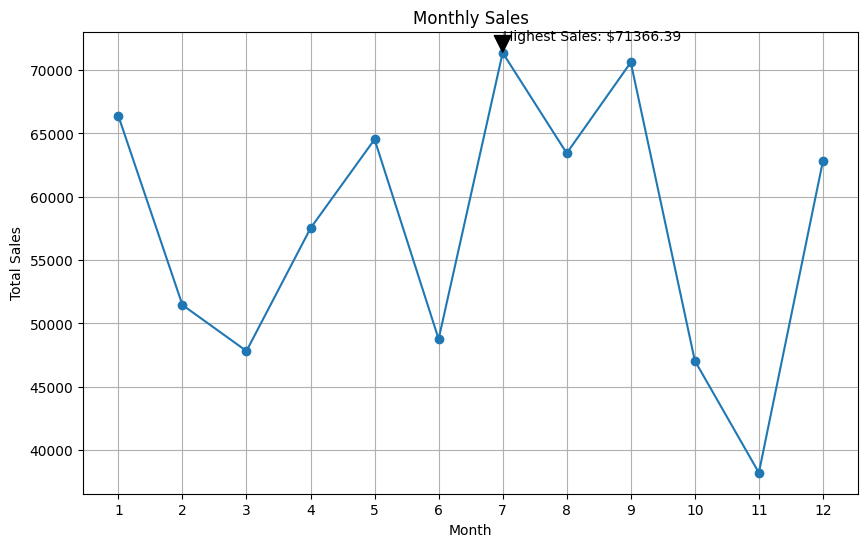

The month with the highest sales is Month 7, with total sales of $71366.39


In [ ]:
import matplotlib.pyplot as plt

highest_sales_month = monthly_sales.idxmax()
highest_sales_value = monthly_sales.max()

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales.index, monthly_sales.values, marker='o', linestyle='-')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(monthly_sales.index)

# Annotate the month with the highest sales
plt.annotate(f'Highest Sales: ${highest_sales_value:.2f}',
             xy=(highest_sales_month, highest_sales_value),
             xytext=(highest_sales_month, highest_sales_value + 1000),
             arrowprops=dict(facecolor='black', shrink=0.05))


plt.grid(True)
plt.show()

print(f"The month with the highest sales is Month {highest_sales_month}, with total sales of ${highest_sales_value:.2f}")

# July has highest sale

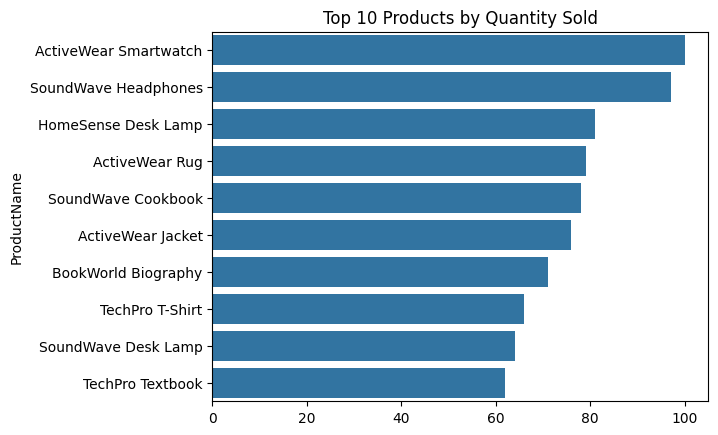

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Product sales distribution
top_products = product_sales.sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index)
plt.title('Top 10 Products by Quantity Sold')
plt.show()

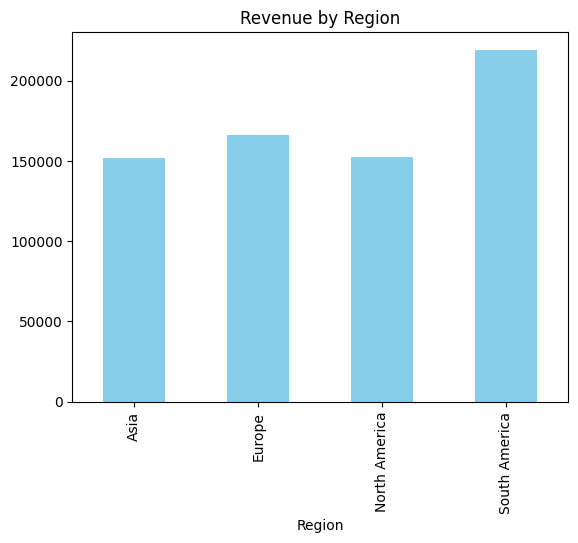

In [ ]:
# Revenue by region
revenue_by_region.plot(kind='bar', color='skyblue', title='Revenue by Region')
plt.show()

# Exploratory Data Analysis (EDA) on eCommerce Datasets

This analysis explores three datasets: Customers, Products, and Transactions, to understand customer behavior, product popularity, and revenue trends.

Data Overview:

* Customers: Contains customer information, including names and regions.
* Products: Contains product details, including names and IDs.
* Transactions: Contains transaction records, linking customers, products, quantities, dates, and total values.

Data Quality:

All datasets are initially checked for missing values. There were no missing values found in the provided datasets, allowing for straightforward analysis. Summary statistics and data types are verified for each dataset to ensure consistency and identify potential outliers.

Key Findings:

Customer Behavior:
* Customer transactions were analyzed, showing the number of transactions per customer. This highlights high-frequency customers.
* The top customers with the highest number of transactions were identified.

Product Popularity:
* Product sales analysis shows total quantity sold per product.
* ActiveWear Smartwatch emerges as the top-selling product.

Revenue Analysis:
* Total revenue was calculated across all transactions.
* Revenue was analyzed by region, with the South America region showing the highest revenue.  
* Revenue was analyzed per product. ActiveWear Smartwatch is the product that contributes the most to the revenue.
* Monthly sales analysis indicates a peak in sales during July.  A plot visualizing monthly sales clearly illustrates this trend.
* The product "ActiveWear Smartwatch" is the highest contributor to revenue.
* The South America region generated the most significant revenue.

Visualizations:

* Monthly Sales Trend: A line plot illustrates monthly sales patterns, highlighting July as the peak sales month.
* Top 10 Products: A bar plot displays the top 10 products by the quantity sold, further emphasizing popular items.
* Revenue by Region: A bar plot visualizes revenue distribution across different regions, showcasing regional performance.

Further Analysis:

* Deeper analysis can be done to identify customer segments or patterns in purchasing behavior.
* Further revenue analysis and explore the impact of promotions or seasonal factors.
* Correlations between product features and sales could provide insights for inventory management or pricing strategies.
* Investigate the relationship between customer demographics and purchasing behavior.

Conclusion:

The EDA provides insights into customer purchasing behaviors, product popularity, and overall revenue trends.  Visualizations aid in understanding key patterns. Further analysis using these datasets can lead to more actionable insights for business decisions.

# END